In [1]:
import pandas as pd
import numpy as np


In [2]:
data  = pd.read_csv("spam.csv" ,encoding='ISO-8859-1')
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

 STEPS : Data cleaning , EDA , Text preprocessing , Model building 
Evaluation , Improvement 

### Data Cleaning

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [5]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)

In [6]:
data.sample(5)

,v1,v2
5138,ham,Yup... I havent been there before... You want ...
214,ham,Sounds great! Are you home now?
4370,ham,Purity of friendship between two is not about ...
2269,ham,Haha i think i did too
4608,ham,Y de asking like this.


In [7]:
data.rename(columns={'v1':'label','v2':'message______'},inplace=True)
data.head()

,label,message______
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
data['label'] = encoder.fit_transform(data['label'])

In [10]:
data.head()

,label,message______
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
data.isnull().sum()

label            0
message______    0
dtype: int64

In [12]:
data.duplicated().sum()

403

In [13]:
data =  data.drop_duplicates(keep='first')
data.shape

(5169, 2)

#EDA

In [14]:
data['label'].value_counts()          #653 spam 

0    4516
1     653
Name: label, dtype: int64

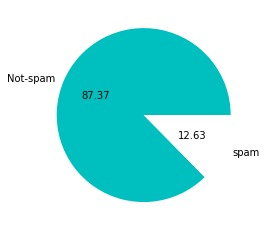

In [15]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts() ,labels=['Not-spam','spam'] , autopct="%0.2f",colors=['c','w'])
plt.show()

Data is imbalanced

In [16]:
import nltk

In [17]:
data['no_of_character']= data['message______'].apply(len)
data.head()

,label,message______,no_of_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [18]:
data['no_of_words'] = data['message______'].apply(lambda x:len(nltk.word_tokenize(x)))
data['no_of_sentence'] = data['message______'].apply(lambda x:len(nltk.sent_tokenize(x)))
data.head()


,label,message______,no_of_character,no_of_words,no_of_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [19]:
data[['no_of_character','no_of_words','no_of_sentence']].describe()


,no_of_character,no_of_words,no_of_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455407,1.961308
std,58.236293,13.322448,1.432583
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


For spam messages

In [20]:
data[data['label']==1][['no_of_character','no_of_words','no_of_sentence']].describe()

,no_of_character,no_of_words,no_of_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.969372
std,30.137753,7.008418,1.488910
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


Spam message are taken more words and sent

For non spam

In [21]:
data[data['label']==0][['no_of_character','no_of_words','no_of_sentence']].describe()

,no_of_character,no_of_words,no_of_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123339,1.815545
std,56.358207,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [22]:
import seaborn as sns

<AxesSubplot:xlabel='no_of_character', ylabel='Count'>

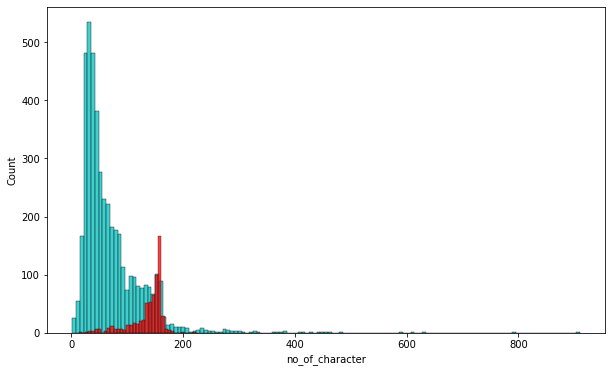

In [23]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['label']==0]['no_of_character'],color='c')
sns.histplot(data[data['label']==1]['no_of_character'],color='r')


<AxesSubplot:xlabel='no_of_words', ylabel='Count'>

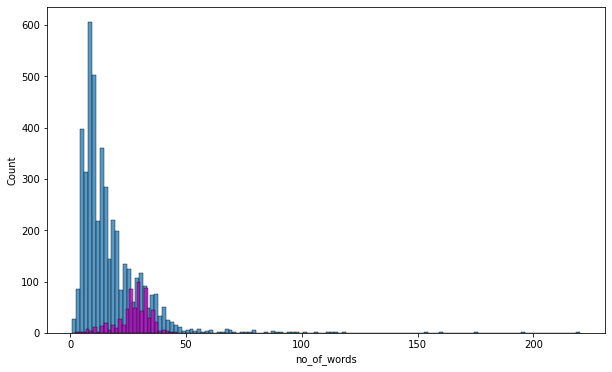

In [24]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['label']==0]['no_of_words'])
sns.histplot(data[data['label']==1]['no_of_words'],color='m')


<AxesSubplot:xlabel='no_of_sentence', ylabel='count'>

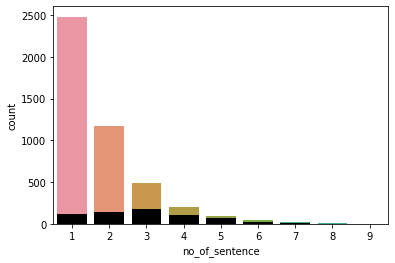

In [25]:
sns.countplot(x=data[data['label']==0]['no_of_sentence'])
sns.countplot(x=data[data['label']==1]['no_of_sentence'],color='#000000')


Relationship b/w columns

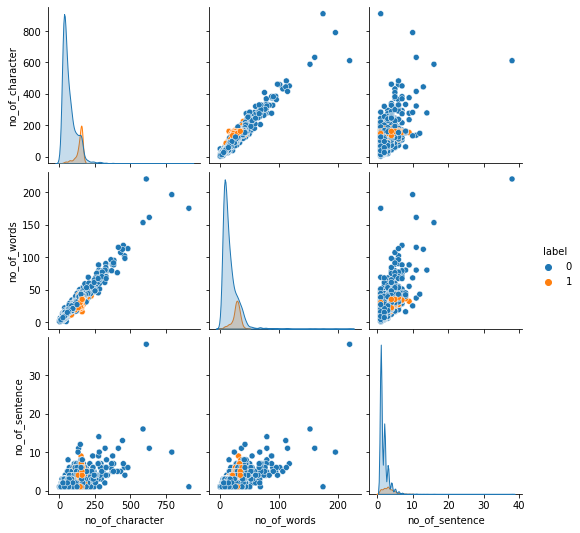

In [26]:
sns.pairplot(data,hue='label')

There are hell lot of outliers woooo

In [27]:
data.corr()

,label,no_of_character,no_of_words,no_of_sentence
label,1.000000,0.384717,0.262969,0.267602
no_of_character,0.384717,1.000000,0.965784,0.626118
no_of_words,0.262969,0.965784,1.000000,0.680882
no_of_sentence,0.267602,0.626118,0.680882,1.000000


<AxesSubplot:>

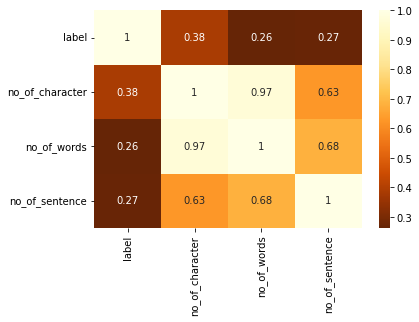

In [28]:
sns.heatmap(data.corr(),annot=True ,cmap="YlOrBr_r")

No of words , no of sent has high collinierity so 

3. DAta preprocessing

In [29]:
# Lower case , Tokenization , Removing special character , Removing stop words and punctuation , stemming (run,running,ran)

In [30]:
from nltk.corpus import stopwords
stopwords.words("english")
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
from nltk.stem.porter import PorterStemmer
psmr = PorterStemmer()
# check
psmr.stem("Running  ")     #woo

'running  '

In [32]:
# This function performs all 5 steps


def text_transformation(text):
    text = text.lower()                  # Lowering chars
    text = nltk.word_tokenize(text)      # tokenizing in word
    
    
    processed_text = []
    for i in text:                       # Removing special chars
        if i.isalnum():  
            processed_text.append(i)
            
    text = processed_text[:]            #Cloning cause copy will empatise 
    processed_text.clear()
        
    for i in text:                      # 4th 
        if i not in stopwords.words("english") and i not in string.punctuation:
            processed_text.append(i)
        
       
    text = processed_text[:]
    processed_text.clear()
    
    for i in text:
        processed_text.append(psmr.stem(i))
    
    
    
    return " ".join(processed_text)  # conv to str

In [33]:
text_transformation("HI There! I Love Python@@@ NLTK & Tensorflow%% how are you hayat ")    # hOW ARE you are stopwords

'hi love python nltk tensorflow hayat'

In [34]:
text_transformation("Are you liking my work?")

'like work'

In [35]:
text_transformation("I loved on my last CGPA of Machine learning  .How about you ?  ")

'love last cgpa machin learn'

In [36]:
# from nltk.corpus import stopwords
# stopwords.words("english")

In [37]:
(data['message______'][0])

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [38]:
text_transformation(data['message______'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [39]:
print((data['message______'][10]))
print("    ")
print(text_transformation(data['message______'][10]))

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.
    
gon na home soon want talk stuff anymor tonight k cri enough today


In [40]:
data['Processed_text'] = data['message______'].apply(text_transformation)

In [41]:
data.head()

,label,message______,no_of_character,no_of_words,no_of_sentence,Processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


Making Ham Spam word cloud (common words)

In [42]:
from wordcloud import WordCloud
wc = WordCloud(width= 500,height=500,min_font_size=10,background_color='white')

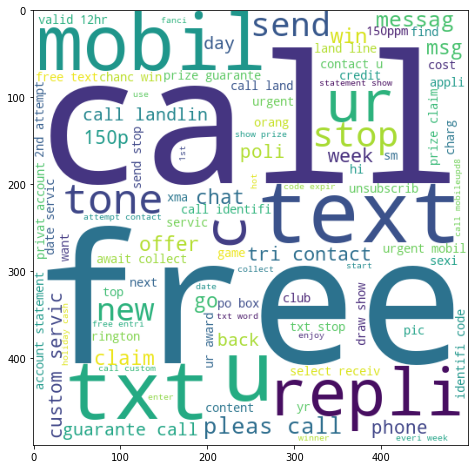

In [43]:
plt.figure(figsize=(15,8))
spam_wc = wc.generate(data[data['label'] == 1]['Processed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)


These are some most common words used in spam messages

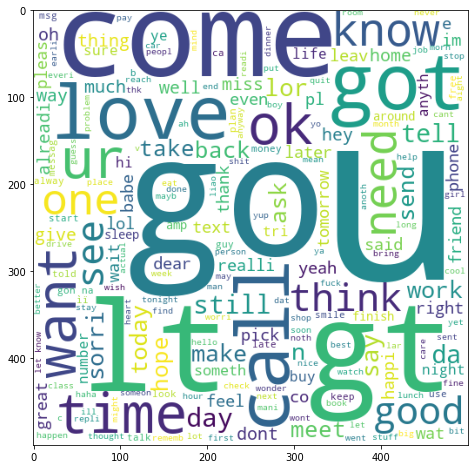

In [44]:
plt.figure(figsize=(15,8))
spam_wc = wc.generate(data[data['label'] == 0]['Processed_text'].str.cat(sep=" "))
plt.imshow(spam_wc)


These are some common words used in non-spam messages or general talks

Extracting top30 words in both ham and spam

In [45]:
data.sample(5)

,label,message______,no_of_character,no_of_words,no_of_sentence,Processed_text
637,0,When Ì_ login dat time... Dad fetching Ì_ home...,51,12,1,login dat time dad fetch home
3553,0,am up to my eyes in philosophy,30,7,1,eye philosophi
3666,0,Honey ? Sweetheart ? Darling ? Sexy buns ? Sug...,135,33,7,honey sweetheart darl sexi bun sugar plum love...
2367,0,V nice! Off 2 sheffield tom 2 air my opinions ...,127,29,4,v nice 2 sheffield tom 2 air opinion categori ...
1337,0,Then she buying today? ÌÏ no need to c meh...,45,12,2,buy today ìï need c meh


In [46]:
spam_words = []
message = data[data['label']==1]['Processed_text'].to_list()
for msg in message:
    for word in msg.split():
        spam_words.append(word)

In [47]:
len(spam_words)

9939

In [48]:
from collections import Counter
Top_spam = Counter(spam_words).most_common(35)
common_30 = pd.DataFrame(Top_spam)
common_30.head(11)

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


Interpretabality - understandability is very imp

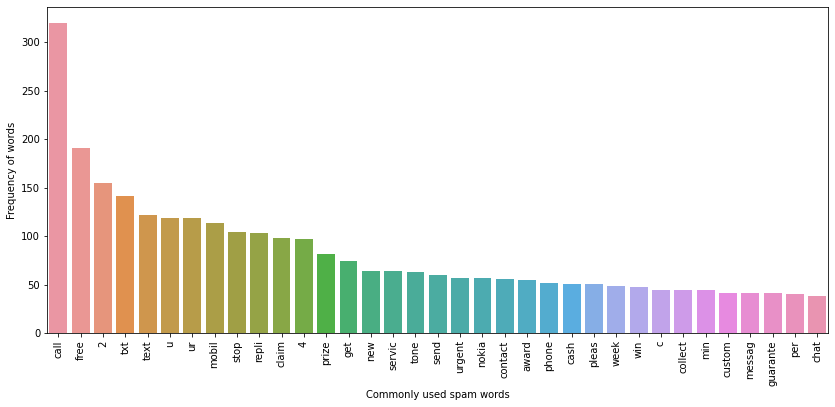

In [49]:
plt.figure(figsize=(14,6))
sns.barplot(x=common_30[0],y=common_30[1])
plt.xticks(rotation='vertical')
plt.xlabel("Commonly used spam words")
plt.ylabel("Frequency of words")
plt.show()

In [50]:
non_spam_words = []
message = data[data['label']==0]['Processed_text'].to_list()
for msg in message:
    for word in msg.split():
        non_spam_words.append(word)

In [51]:
len(non_spam_words)

35402

In [52]:
Top_non_spam = Counter(non_spam_words).most_common(30)
Ncommon_30 = pd.DataFrame(Top_non_spam)
Ncommon_30.head(10)

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


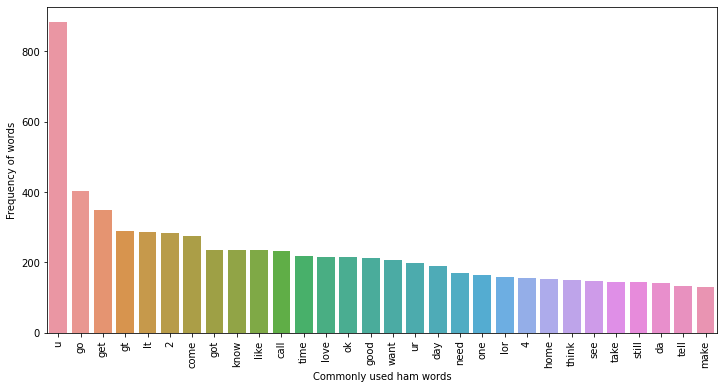

In [53]:
plt.figure(figsize=(12,6))
sns.barplot(x=Ncommon_30[0],y=Ncommon_30[1])
plt.xticks(rotation='vertical')
plt.xlabel("Commonly used ham words")
plt.ylabel("Frequency of words")
plt.show()

In [54]:
#Words are shortened cause of stemming process

So the most waited part model building


Generally Naive Bayes is considered BEST for texual problems but wil try others algorithms as well 

4. Model Building

In [55]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer 
cv = CountVectorizer()
tv = TfidfVectorizer()

In [56]:
X = cv.fit_transform(data['Processed_text']).toarray()
X.shape

(5169, 6708)

In [57]:
Y = data['label'].values
print(Y.shape)
Y

(5169,)


array([0, 0, 1, ..., 0, 0, 0])

In [58]:
from sklearn.model_selection import train_test_split
X_train ,X_test ,Y_train ,Y_test = train_test_split(X ,Y, test_size=0.2 ,random_state=2)

print(X_train.shape)
print(X_test.shape)

(4135, 6708)
(1034, 6708)


In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import confusion_matrix,precision_score,accuracy_score

In [60]:
gaussian = GaussianNB()
bernoulli = BernoulliNB()
multinom = MultinomialNB()

In [61]:
gaussian.fit(X_train ,Y_train)
yPredicted1 = gaussian.predict(X_test)
print(confusion_matrix (Y_test ,yPredicted1))
print("Accuracy score of gaussian NB is  : "  + str(accuracy_score(yPredicted1,Y_test) ))
print("Precision score of gaussian NB is  : "  +str(precision_score(yPredicted1,Y_test) ))


[[792 104]
 [ 20 118]]
Accuracy score of gaussian NB is  : 0.8800773694390716
Precision score of gaussian NB is  : 0.855072463768116


In [62]:
bernoulli.fit(X_train ,Y_train)
yPredicted2 = bernoulli.predict(X_test)
print(confusion_matrix (Y_test,yPredicted2))
print("Accuracy score of bernoulli NB is  : "  + str(accuracy_score(yPredicted2,Y_test) ))
print("Precision score of bernoulli NB is  : " +str(precision_score(yPredicted2,Y_test) ))


[[893   3]
 [ 28 110]]
Accuracy score of bernoulli NB is  : 0.9700193423597679
Precision score of bernoulli NB is  : 0.7971014492753623


In [63]:
multinom.fit(X_train ,Y_train)
yPredicted3 = multinom.predict(X_test)
print(confusion_matrix (Y_test ,yPredicted3))
print("Accuracy score of multinom NB is  : "  + str(accuracy_score(yPredicted3,Y_test) ))
print("Precision score of multinom NB is  : " +str(precision_score(yPredicted3,Y_test) ))


[[871  25]
 [ 12 126]]
Accuracy score of multinom NB is  : 0.9642166344294004
Precision score of multinom NB is  : 0.9130434782608695


Precision matters more here since data is imbalanced

Multinomial naive bayes giving better result here with countvectorizer
But let's try some other algorithms

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [65]:
# Creating objects
knc = KNeighborsClassifier()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression()
mnb = MultinomialNB()
rbc = RandomForestClassifier(n_estimators=50 ,random_state=2)
adbc = AdaBoostClassifier(n_estimators=50 ,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50 ,random_state=2)
gdbc = GradientBoostingClassifier(n_estimators=50 ,random_state=2)
xbc = XGBClassifier(n_estimators=50 ,random_state=2)
svc = SVC(kernel='sigmoid',gamma=1.0)

In [66]:
classifiers = {
    'KNeighborsClassifier'   : knc,
    'DecisionTreeClassifier ':dtc,
    'LogisticRegression'     :lrc,
    'MultinomialNB'          :mnb,
    'RandomForestClassifier' :rbc,
    'AdaBoostClassifier'     :adbc,
    'ExtraTreesClassifier'   :etc,
    'GradientBoostingClassifier':gdbc,
    'XGBClassifier'          :xbc,
    'SupportVectorClassifier':svc
    
}

In [67]:
 def train_classifiers(classifiers ,X_train ,X_test ,Y_train ,Y_test):
        classifiers.fit(X_train,Y_train)
        
        yPredicted = classifiers.predict(X_test)
        accuracy_ = accuracy_score(Y_test ,yPredicted )
        precision_ = precision_score(Y_test ,yPredicted )
        cf_matrix_ = confusion_matrix(Y_test ,yPredicted )
        
        return accuracy_ ,precision_
        
    

In [68]:
# testing function
train_classifiers(mnb ,X_train ,X_test ,Y_train ,Y_test)

(0.9642166344294004, 0.8344370860927153)

In [69]:
accuracy_scores = []
precision_scores = []

for name,clf in classifiers.items():
    
    curr_accuracy ,curr_precision = train_classifiers(clf ,X_train ,X_test ,Y_train ,Y_test)
    
#     print("For ",name)
#     print("Accuracy score is ",curr_accuracy)
#     print("Precision score is ",curr_precision)
    
    accuracy_scores.append(curr_accuracy)
    precision_scores.append(curr_precision)

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:11:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [70]:
performance_dataFrame = pd.DataFrame({
    "Algorithm" : classifiers.keys(),
    "Accuracy" : accuracy_scores,
    "Precision-score" : precision_scores
}).sort_values("Precision-score",ascending=False)

In [71]:
performance_dataFrame

,Algorithm,Accuracy,Precision-score
0,KNeighborsClassifier,0.906190,1.000000
4,RandomForestClassifier,0.971954,1.000000
2,LogisticRegression,0.978723,0.991525
6,ExtraTreesClassifier,0.976789,0.991379
8,XGBClassifier,0.973888,0.966387
5,AdaBoostClassifier,0.963250,0.946429
7,GradientBoostingClassifier,0.943907,0.944444
1,DecisionTreeClassifier,0.956480,0.884298
3,MultinomialNB,0.964217,0.834437
9,SupportVectorClassifier,0.930368,0.766129


In [72]:
pfDf1 = pd.melt(performance_dataFrame ,id_vars = "Algorithm")


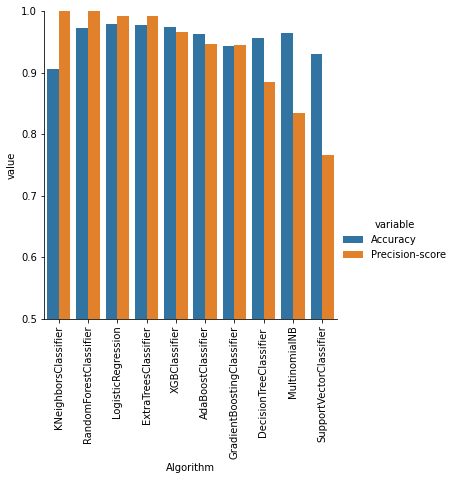

In [73]:
sns.catplot(x="Algorithm" ,y="value" ,hue="variable" , data=pfDf1 ,kind="bar" ,height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation="vertical")
plt.show()

Model Improvement more

In [74]:
# Let's try Changing the max_features parameter of TfIdf by different vals (3500 was found with some improvements )
# result not much improvement

In [75]:
# Checking Voting Classifier   
rbc = RandomForestClassifier(n_estimators=50 ,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
lrc = LogisticRegression()

from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('RandomForestClassifier', rbc ), 
('ExtraTreesClassifier', etc), ('LogisticRegression', lrc) ],voting='soft')

In [76]:
voting.fit(X_train ,Y_train)

VotingClassifier(estimators=[('RandomForestClassifier',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('ExtraTreesClassifier',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2)),
                             ('LogisticRegression', LogisticRegression())],
                 voting='soft')

In [77]:
Y_Predicted = voting.predict(X_test)
print("Accuracy",accuracy_score(Y_test,Y_Predicted))
print("Precision",precision_score(Y_test,Y_Predicted)) 

Accuracy 0.9777562862669246
Precision 1.0


Accuracy is improved a bit 

In [78]:
# Checking  stacking
from sklearn.ensemble import StackingClassifier

### So finally we decided to take voting classifier

In [82]:
import pickle
pickle.dump(cv, open('vectorizer.pkl' ,'wb' ))
pickle.dump(voting, open('modelFinal.pkl' ,'wb' ))